# 🖍Import Essential libraries

In [1]:
import re
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 📚Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/New_Approach/Idioms_dataset.csv')      #.rename(columns={'idiom_expression':'text'})
from sklearn.utils import shuffle
df = shuffle(df)
df.head(2)

,idioms,literal_meaning
467,ቁስሉ ምጠጠ,ቁስሉ ደረቀ
159,ሃይማኖቱን ለወጠ,ሃይማኖቱን ካደ


In [4]:
# Preprocess the data
idioms = df['idioms'].values
meanings = df['literal_meaning'].values

## ⚡ Data Visualization

In [5]:
# Splitting the dataset by label
df_a = df['idioms']
df_b = df['literal_meaning']

### ✔ Class Frequencies

In [6]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [7]:
# Visualization of class frequencies
values = np.array([len(df_a), len(df_b)])
labels = ['Literals', 'Idioms']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of class frequencies"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95))
fig.show()

### ✔ Number of Characters

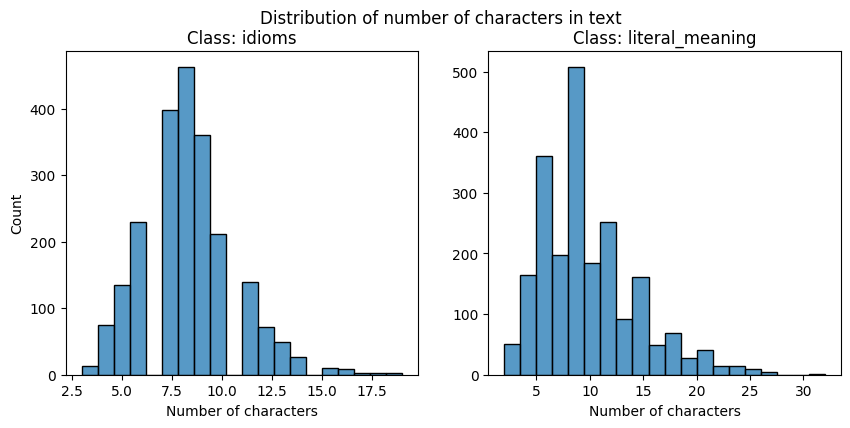

In [8]:
# Distribution of number of words in description
df_a_char = df_a.str.len()
df_b_char = df_b.str.len()

fig, ax = plt.subplots(1, 2, figsize=(10, 4.2), sharey=False)
sns.histplot(x=df_a_char, bins=20, ax=ax[0]).set_title('Class: idioms')
sns.histplot(x=df_b_char, bins=20, ax=ax[1]).set_title('Class: literal_meaning')

fig.suptitle("Distribution of number of characters in text")
ax[0].set_xlabel("Number of characters")
ax[1].set_xlabel("Number of characters")
ax[1].set_ylabel(" ")

plt.show()

### ✔ Number of Words

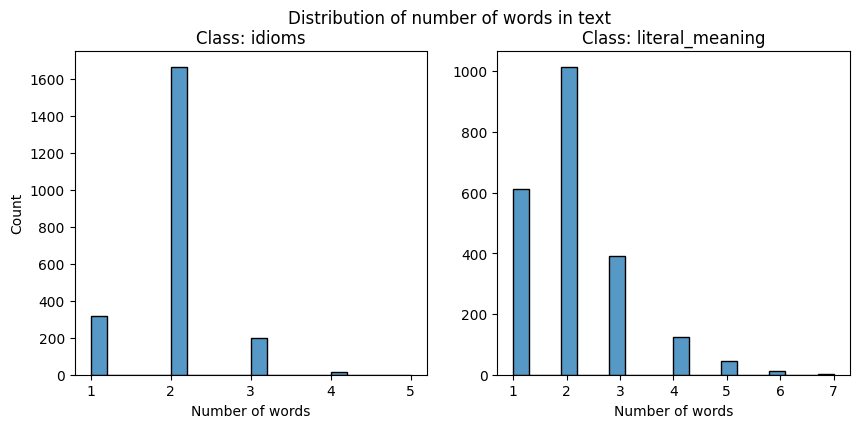

In [9]:
# Distribution of number of words in description
df_a_word = df_a.str.split().map(lambda x: len(x))
df_b_word = df_b.str.split().map(lambda x: len(x))

fig, ax = plt.subplots(1, 2, figsize=(10, 4.2), sharey=False)
sns.histplot(x=df_a_word, bins=20, ax=ax[0]).set_title('Class: idioms')
sns.histplot(x=df_b_word, bins=20, ax=ax[1]).set_title('Class: literal_meaning')

fig.suptitle("Distribution of number of words in text")
ax[0].set_xlabel("Number of words")
ax[1].set_xlabel("Number of words")
ax[1].set_ylabel(" ")

plt.show()

In [10]:
df_b_word_counts = df_b_word.value_counts()
df_b_word_counts = df_b_word_counts[df_b_word_counts.index != 5]

In [11]:
df_a_word_counts = df_a_word.value_counts()
df_a_word_counts = df_a_word_counts[df_a_word_counts.index != 5]

In [12]:
df_a_word_counts

,count
idioms,
2,1666
1,320
3,197
4,15


### ✔ Average Word-length

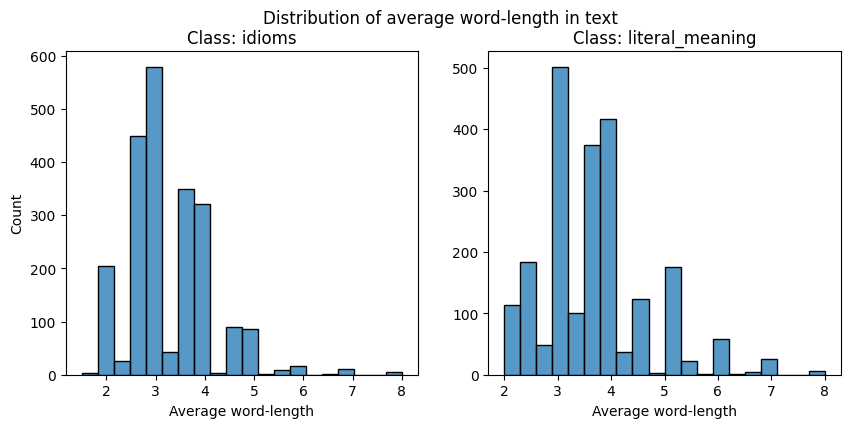

In [13]:
# Distribution of average word-length in description
data_a_avg = df_a.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_b_avg = df_b.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, ax = plt.subplots(1, 2, figsize = (10, 4.2), sharey = False)
sns.histplot(x = data_a_avg, bins = 20, ax = ax[0]).set_title('Class: idioms')
sns.histplot(x = data_b_avg, bins = 20, ax = ax[1]).set_title('Class: literal_meaning')


fig.suptitle("Distribution of average word-length in text")
ax[0].set_xlabel("Average word-length")
ax[1].set_xlabel("Average word-length")
ax[1].set_ylabel(" ")

plt.show()

# Preprocessing datasets

## ⚡ Removal of Whitespaces

In [14]:
# remove whitespace from text
def remove_whitespace(text):
	return " ".join(text.split())
text = " \t   አበበ ትምህርት     ቤት ሄደ። \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	   አበበ ትምህርት     ቤት ሄደ። 	 
Output: አበበ ትምህርት ቤት ሄደ።


## ⚡ Short Form Expansion

In [15]:
def expand_short_form(text):
    text = re.sub(r"እ/ና", "እና", text)
    text = re.sub("እ/ር", "እግዚያብሄር", text)
    text = re.sub("ሰ/ማ", "ሰማይ", text)
    text = re.sub("ዶ/ር", "ዶክተር", text)
    text = re.sub("ኢ/ያ", "ኢትዮጵያ", text)
    text = re.sub("ጠ/ሚኒስትር", "ጠቅላይ ሚኒስትር", text)
    text = re.sub("ወ/ሮ", "ወይዘሮ", text)
    text = re.sub("ወ/ሪት", "ወይዘሪት", text)
    text = re.sub("ወ/ት", "ወጣት", text)
    text = re.sub("ፕ/ት", "ፕሬዝዳንት", text)
    text = re.sub("ፕ/ር", "ፕሮፌሰር", text)
    text = re.sub("መ/ር", "መምህር", text)
    text = re.sub("መ/ርት", "መምህርት", text)
    text = re.sub("ገ/መስቀል", "ገብረ መስቀል", text)
    text = re.sub("ገ/መድህን", "ገብረ መድህን",text)
    text = re.sub("ወ/ሰንበት", "ወልደ ሰንበት", text)
    text = re.sub("ዓ/ም", "ዓመተ ምህረት", text)
    text = re.sub("እ/ኢ/አ", "እንደ ኢሮፓውያን አቆጣጠር", text)
    text = re.sub("ዓ.ም", "ዓመተ ምህረት", text)
    text = re.sub("ዶ.ር", "ዶክተር", text)
    text = re.sub("እ.ኢ.አ", "እንደ ኢሮፓውያን አቆጣጠር", text)
    text = re.sub("እ.ር", "እግዚአብሄር", text)
    text = re.sub("ኢ.ያ", "ኢትዮጵያ", text)
    text = re.sub("ጠ.ሚኒስትር", "ጠቅላይ ሚኒስትር", text)
    text = re.sub("ወ.ሮ", "ወይዘሮ", text)
    text = re.sub("ወ.ሪት", "ወይዘሪት", text)
    text = re.sub("ወ.ት", "ወጣት", text)
    text = re.sub("ፕ.ት", "ፕሬዝዳንት", text)
    text = re.sub("መ.ር", "መምህር", text)
    text = re.sub("መ.ርት", "መምህርት", text)
    text = re.sub("ገ.መስቀል", "ገብረ መስቀል", text)
    text = re.sub("ገ.መድህን", "ገብረ መድህን", text)
    text = re.sub("ወ.ሰንበት", "ወልደ ሰንበት", text)
    text = re.sub("ጠ/ሚ/ር", "ጠቅላይ ሚኒስትር", text)
    text = re.sub("ጠ.ሚ.ር", "ጠቅላይ ሚኒስትር", text)
    text = re.sub("ጽ/ቤት", "ጽህፈት ቤት", text)
    text = re.sub("ፍ/ቤት", "ፍርድ ቤት", text)
    text = re.sub("ፍ.ቤት", "ፍርድ ቤት", text)
    text = re.sub("ት/ቤት", "ትምህርት ቤት", text)
    text = re.sub("ት.ቤት", "ትምህርት ቤት", text)
    text = re.sub("ም/ኮሚሽነር", "ምክትል ኮሚሽነር", text)
    text = re.sub("ም.ኮሚሽነር", "ምክትል ኮሚሽነር", text)
    text = re.sub("ኃ/የተ/ግ/ማ", "ኃላፊነቱ የተወሰነ የግል ማህበር", text)
    text = re.sub("ኃ.የተ.ግ.ማ", "ኃላፊነቱ የተወሰነ የግል ማህበር", text)
    return text
input_short_form = "ዶ/ር"
expanded_form = expand_short_form(input_short_form)

print(f"Expanded form of '{input_short_form}': {expanded_form}")

Expanded form of 'ዶ/ር': ዶክተር


## ⚡ Removal of Punctuations

In [16]:
def remove_punctuations(text):
    space_pattern = '\s+'
    url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    englishword_num ='[a-zA-Z]|[0-9]+'
    AmhPunc='[፤።፡፣:,.?/()•“”*፨]+'
    special_char = "[@#$%^&=?×!,;:_.(){}`'/+*<>\"¤— „\ ®¯™¡¡\x10»€«·‘0e1b§”¬¦…""f÷\~¨©±¥£¶–°•˜’“|]"
    geez_number=' [፩ ፪ ፫ ፬ ፭ ፮ ፯ ፰ ፱ ፲ ፳ ፴ ፵ ፶ ፷ ፸ ፹ ፺ ፻] ' # for removing geez number
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    Clean_text = re.sub(url_regex,'', text)
    Clean_text = re.sub(AmhPunc,' ',Clean_text)
    Clean_text=re.sub(special_char,' ',Clean_text)
    Clean_text= re.sub(englishword_num,'',Clean_text)
    Clean_text= re.sub(r'(.)\1+', r'\1\1',Clean_text) #removing elongation in text
    Clean_text = RE_EMOJI.sub(r'', Clean_text)
    Clean_text =re.sub(geez_number,'',Clean_text)
    Clean_text=re.sub('-','',Clean_text)
    Clean_text=re.sub(r'<[^>]*>','', Clean_text)
    Clean_text=re.sub('-',' ',Clean_text)
    Clean_text = Clean_text.replace("\\", "");
    Clean_text = Clean_text.replace("‹‹", "");
    Clean_text = Clean_text.replace("››", "");
    Clean_text = Clean_text.replace("፥", "");
    Clean_text = Clean_text.replace("፩", "");
    Clean_text = Clean_text.replace("፪", "");
    Clean_text = Clean_text.replace("፫", "");
    Clean_text = Clean_text.replace("፬", "");
    Clean_text = Clean_text.replace("፭", "");
    Clean_text = Clean_text.replace("፮", "");
    Clean_text = Clean_text.replace("፯", "");
    Clean_text = Clean_text.replace("፰", "");
    Clean_text = Clean_text.replace("፱", "");
    Clean_text = Clean_text.replace("፲", "");
    Clean_text = Clean_text.replace("[", "");
    Clean_text = Clean_text.replace("]", "");
    Clean_text = Clean_text.replace("(", "");
    Clean_text = Clean_text.replace(")", "");
    Clean_text = re.sub(space_pattern,' ',Clean_text)
    return Clean_text

text = " \t   አበበ ትምህርት/pkv=     ቤት ሄደ። \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuations(text)))

Input:  	   አበበ ትምህርት/pkv=     ቤት ሄደ። 	 
Output:  አበበ ትምህርት ቤት ሄደ 


## ⚡ Text Normalization

In [17]:
def normalize_char_level_missmatch(text):
    rep1=re.sub('[ሃ,ኅ,ኃ,ሐ,ሓ,ኻ]','ሀ',text)
    rep2=re.sub('[ሑኁዅኹ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሗኇዃ]','ኋ',rep6)
    rep8=re.sub('[ሠ]','ሰ',rep7)
    rep9=re.sub('[ሡ]','ሱ',rep8)
    rep10=re.sub('[ሢ]','ሲ',rep9)
    rep11=re.sub('[ሣ]','ሳ',rep10)
    rep12=re.sub('[ሤ]','ሴ',rep11)
    rep13=re.sub('[ሥ]','ስ',rep12)
    rep14=re.sub('[ሦ]','ሶ',rep13)
    rep15=re.sub('[ዓኣዐ]','አ',rep14)
    rep16=re.sub('[ዑ]','ኡ',rep15)
    rep17=re.sub('[ዒ]','ኢ',rep16)
    rep18=re.sub('[ዔ]','ኤ',rep17)
    rep19=re.sub('[ዕ]','እ',rep18)
    rep20=re.sub('[ዖ]','ኦ',rep19)
    rep21=re.sub('[ጸ]','ፀ',rep20)
    rep22=re.sub('[ጹ]','ፁ',rep21)
    rep23=re.sub('[ጺ]','ፂ',rep22)
    rep24=re.sub('[ጻ]','ፃ',rep23)
    rep25=re.sub('[ጼ]','ፄ',rep24)
    rep26=re.sub('[ጽ]','ፅ',rep25)
    rep27=re.sub('[ጾ]','ፆ',rep26)
    #Normalizing words with Rounded Amharic characters such as በልቱዋል or በልቱአል to በልቷል
    rep28=re.sub('(ሉ[ዋአ])','ሏ',rep27)
    rep29=re.sub('(ሙ[ዋአ])','ሟ',rep28)
    rep30=re.sub('(ቱ[ዋአ])','ቷ',rep29)
    rep31=re.sub('(ሩ[ዋአ])','ሯ',rep30)
    rep32=re.sub('(ሱ[ዋአ])','ሷ',rep31)
    rep33=re.sub('(ሹ[ዋአ])','ሿ',rep32)
    rep34=re.sub('(ቁ[ዋአ])','ቋ',rep33)
    rep35=re.sub('(ቡ[ዋአ])','ቧ',rep34)
    rep36=re.sub('(ቹ[ዋአ])','ቿ',rep35)
    rep37=re.sub('(ሁ[ዋአ])','ኋ',rep36)
    rep38=re.sub('(ኑ[ዋአ])','ኗ',rep37)
    rep39=re.sub('(ኙ[ዋአ])','ኟ',rep38)
    rep40=re.sub('(ኩ[ዋአ])','ኳ',rep39)
    rep41=re.sub('(ዙ[ዋአ])','ዟ',rep40)
    rep42=re.sub('(ጉ[ዋአ])','ጓ',rep41)
    rep43=re.sub('(ዱ[ዋአ])','ዷ',rep42)
    rep44=re.sub('(ጡ[ዋአ])','ጧ',rep43)
    rep45=re.sub('(ጩ[ዋአ])','ጯ',rep44)
    rep46=re.sub('(ጹ[ዋአ])','ጿ',rep45)
    rep47=re.sub('(ፉ[ዋአ])','ፏ',rep46)
    rep48=re.sub('[ቊ]','ቁ',rep47) #ቁ can be written as ቊ
    rep49=re.sub('[ኵ]','ኩ',rep48) #ኩ can be also written as ኵ
    return rep49

## ⚡ Spell Checker and Corrector

In [18]:
word_path = '/content/drive/MyDrive/New_Approach/dictionary2.txt'
with open(word_path, 'r', encoding='utf-8', errors='replace') as file:
    lang_dict = [line.rstrip().split()[0] for line in file if line.strip()]  # Add a condition to skip empty lines
lang_dict[:5]

['እንዳለውም', 'አላማችን', 'ሰደደ', 'ሲጥ', 'ሊቀመንበር']

In [19]:
!pip install fuzzywuzzy

In [20]:
from fuzzywuzzy import fuzz
class SpellChecker:

    def __init__(self, dict_file=None):
        with open(dict_file, 'r', encoding='utf-8', errors='replace') as f:
          lang_dict = [line.rstrip().split()[0] for line in f if line.strip()]

        lang_dict = set(lang_dict)

        self.dictionary = list(lang_dict)

    def is_misspelled(self, word):
        uknown = False
        if word not in self.dictionary:
            uknown = True
        return uknown

    def get_suggestions(self, uknown_word):

        suggestions = {}

        for word in self.dictionary:
            match_percent = fuzz.ratio(uknown_word, word)
            if  match_percent>= 75:
                suggestions[word] = match_percent

        return suggestions

    def remove_punc_and_special_chars(self, word):
        import re
        normalized_word = re.sub('[\!\@\#\$\%\^\«\»\&\*\(\)\…\[\]\{\}\;\“\”\›\’\‘\"\'\:\,\.\‹\/\<\>\?\\\\|\`\´\~\-\=\+\፡\።\፤\;\፦\፥\፧\፨\፠\፣]', '',word)
        return normalized_word

    def correct_misspelled(self, text_input):
        words = text_input.split()
        words = [self.remove_punc_and_special_chars(word) for word in words]
        corrected_words = []
        for word in words:
          if self.is_misspelled(word):
              suggestion = self.get_suggestions(word)
              sorted_suggestion = sorted(suggestion.items(), key=lambda x: x[1], reverse=True)
              print(f'suggestions for {word}: ',sorted_suggestion)
              if sorted_suggestion:
                corrected_words.append(sorted_suggestion[0][0])
              else:
                corrected_words.append(word)
          else:
              corrected_words.append(word)

        return " ".join(corrected_words)

In [21]:
import codecs

dict_path = '/content/drive/MyDrive/New_Approach/dictionary2.txt'

# Open the dictionary file with the appropriate encoding
with codecs.open(dict_path, 'r', encoding='utf-8', errors='replace') as file:
    dictionary = {word.strip(): None for word in file}

# Create an object
spell_check = SpellChecker(dict_path)

# Set the string
input_text = "ከበደ ወደ ትምህህ ቤ ሄደ።"
corrected = spell_check.correct_misspelled(input_text)
print(corrected)

suggestions for ትምህህ:  []
suggestions for ቤ:  []
ከበደ ወደ ትምህህ ቤ ሄደ


## ⚡ Stop Word Removal

In [22]:
# Amharic stop word removal
stop_words = ['እና', 'ወደ', 'ከ', 'በዚህ', 'በስተቀር', 'ለ', 'ስለ', 'እርስዎ', 'ምን', 'ነው', 'መሆኑ', 'ናቸው','ነበር','ማለት','በጣም','ብቻ','ሲሆን','ሆኖም','ሆነ', 'እንዴት', 'ለሁሉም', 'ለማድረግ', 'ለማንኛውም', 'ሌላ', 'ለትልቅ']
def remove_stopwords(text):
    # Split the text into words
    words = text.split()

    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)

    # Remove any remaining whitespace
    filtered_text = re.sub(r'\s+', ' ', filtered_text).strip()

    return filtered_text

amharic_text = "ለማስተማር የሚያስፈልጉ ተማሪዎች በመብት እና ለማንኛውም የሚያስፈልጉ ስሞች በስተቀር ወደ ትልቅ አባላት ለመከታተል ይህንን መረጃዎች ይጫኑ."

filtered_text = remove_stopwords(amharic_text)
print(filtered_text)

ለማስተማር የሚያስፈልጉ ተማሪዎች በመብት የሚያስፈልጉ ስሞች ትልቅ አባላት ለመከታተል ይህንን መረጃዎች ይጫኑ.


## ⚡ Tokenizations

## ⚡ Integration of the Processes

In [23]:
def text_normalizer(text):
    text = remove_whitespace(text)
    text = expand_short_form(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_punctuations(text)
    text = normalize_char_level_missmatch(text)
    #text = remove_stopwords(text)
    return text

text = " \t   አበበ ጠንክሮ ትምሕርቱን/pkv=     ቢማር ዶ/ር ሆነ። \t "
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input:  	   አበበ ጠንክሮ ትምሕርቱን/pkv=     ቢማር ዶ/ር ሆነ። 	 
Output: አበበ ጠንክሮ ትምህርቱን ቢማር ዶክተር ሆነ 


In [24]:
df['idioms'] = df['idioms'].apply(text_normalizer)
df['literal_meaning'] = df['literal_meaning'].apply(text_normalizer)

In [25]:
#df['text'] = df['text'].apply(spell_check.correct_misspelled)

### ✏ ***To save cleaned dataset***

In [26]:
df.to_csv('/content/drive/MyDrive/New_Approach/idiom_dataset.csv', index=False)